In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
data = pd.read_csv("./kaggle/Google_Stock_Price_Train.csv", thousands=',')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data.corr()

,Date,Open,High,Low,Close,Volume
Date,1.000000,0.958852,0.959359,0.958898,-0.056554,-0.577304
Open,0.958852,1.000000,0.999692,0.999498,0.125832,-0.530506
High,0.959359,0.999692,1.000000,0.999480,0.124351,-0.526936
Low,0.958898,0.999498,0.999480,1.000000,0.129001,-0.538273
Close,-0.056554,0.125832,0.124351,0.129001,1.000000,0.192357
Volume,-0.577304,-0.530506,-0.526936,-0.538273,0.192357,1.000000


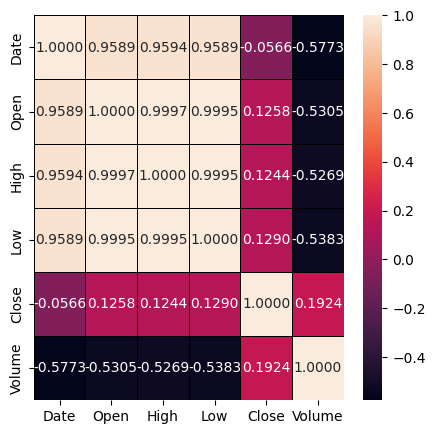

In [15]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In [17]:
data_set = data.loc[:, ["Open"]].values
data_set
train = data_set[:len(data_set) - 50]
test = data_set[len(train):]

train.reshape(train.shape[0],1)
train.shape

(1208, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaler = scaler.fit_transform(train)
train_scaler


array([[0.08886192],
       [0.10045847],
       [0.09768454],
       ...,
       [0.96447835],
       [0.97998536],
       [1.        ]])

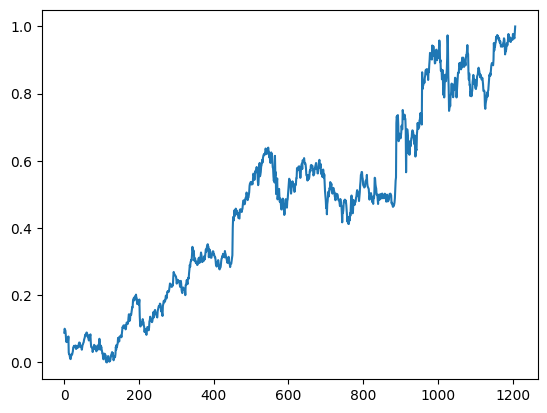

In [19]:
plt.plot(train_scaler)
plt.show()

# Create And Training RNN model


In [27]:
X_train = []
Y_train = []
timesteps = 10

for i in range(timesteps, len(train_scaler)):
    X_train.append(train_scaler[i - timesteps:i, 0])
    Y_train.append(train_scaler[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

# reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [28]:
# Import Library
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Initialising the RNN
regressor = Sequential()

# Add the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

# Fitting the RNN to the training set
regressor.fit(X_train, Y_train, epochs = 10, batch_size = 32)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4662
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2099
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1468
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1096
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0796
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0646
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0506
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0473
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0386
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0373


In [29]:
inputs = data_set[len(data_set) - len(test) - timesteps:]
inputs = scaler.transform(inputs)


In [43]:
X_test = []
Y_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i - timesteps:i, 0])
    Y_test.append(inputs[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


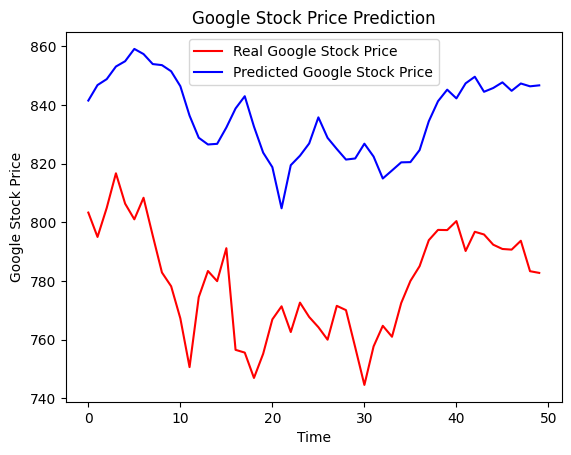

In [44]:
# visualising the results
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [45]:

# Function for user input prediction
def predict_stock_price(user_input):
    # Reshape to 2D array before scaling
    user_input_2d = np.array(user_input).reshape(-1, 1)

    # Scale user input
    user_input_scaled = scaler.transform(user_input_2d)

    # Reshape for prediction (1 sample, timesteps, 1 feature)
    user_input_reshaped = user_input_scaled.reshape(1, timesteps, 1)

    predicted_price = regressor.predict(user_input_reshaped)

    # Invert scaling
    predicted_price = scaler.inverse_transform(predicted_price)

    return predicted_price[0][0]
# User Input
while True:
    try:
        user_days = int(input("Enter the number of days of past data to use for prediction (up to 50): "))
        if 0 < user_days <= timesteps:
            break
        else:
            print("Invalid input. Please enter a value between 1 and", timesteps)
    except ValueError:
        print("Invalid input. Please enter a number.")

user_past_prices = []
for i in range(user_days):
    while True:
        try:
            past_price = float(input("Enter the opening price for day " + str(i + 1) + ": "))
            user_past_prices.append(past_price)
            break
        except ValueError:
            print("Invalid input. Please enter a number.")

# User prediction
predicted_price = predict_stock_price(user_past_prices)
print("Predicted opening price for the next day:", predicted_price)

Enter the number of days of past data to use for prediction (up to 50): 10
Enter the opening price for day 1: 100
Enter the opening price for day 2: 00
Enter the opening price for day 3: 80
Enter the opening price for day 4: 80
Enter the opening price for day 5: 78
Enter the opening price for day 6: 560
Enter the opening price for day 7: 300
Enter the opening price for day 8: 240
Enter the opening price for day 9: 500
Enter the opening price for day 10: 1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted opening price for the next day: 399.70914
